In [3]:
#https://www.kaggle.com/code/pritamguha31/fifa-19-players-analysis
#https://www.youtube.com/watch?v=WZJoONIvG7M
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor

#한글 폰트 설치
#!sudo apt-get install -y fonts-nanum
#!sudo fc-cache -fv]
#!rm ~/.cache/matplotlib -rf
plt.rc('font', family='NanumBarunGothic')

## 데이터 확인

In [4]:
train=pd.read_csv('/content/FIFA_train.csv')
test =pd.read_csv('/content/FIFA_train.csv')
print(train.shape)
print(test.shape)

(8932, 12)
(8932, 12)


In [5]:
# predict 및 제출할 컬럼 미리 생성
test_id = test['name']

# y_test 값은 id 삭제 후 array형태로 변형
# y_test = y_test.drop('StudentID', axis=1)
y_test= test.to_numpy()
y_test

array([[0, 'L. Messi', 31, ..., 94, 4.0, 110500000.0],
       [3, 'De Gea', 27, ..., 93, 1.0, 72000000.0],
       [7, 'L. Suárez', 31, ..., 91, 3.0, 80000000.0],
       ...,
       [16941, 'N. Fuentes', 18, ..., 64, 2.0, 50000.0],
       [16942, 'J. Milli', 18, ..., 65, 1.0, 50000.0],
       [16948, 'N. Christoffersson', 19, ..., 63, 2.0, 60000.0]],
      dtype=object)

In [6]:
train.head()

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0


In [7]:
test.head()

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0


In [8]:
train.columns

Index(['id', 'name', 'age', 'continent', 'contract_until', 'position',
       'prefer_foot', 'reputation', 'stat_overall', 'stat_potential',
       'stat_skill_moves', 'value'],
      dtype='object')

In [9]:
train.isna().sum()

id                  0
name                0
age                 0
continent           0
contract_until      0
position            0
prefer_foot         0
reputation          0
stat_overall        0
stat_potential      0
stat_skill_moves    0
value               0
dtype: int64

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                8932 non-null   int64  
 1   name              8932 non-null   object 
 2   age               8932 non-null   int64  
 3   continent         8932 non-null   object 
 4   contract_until    8932 non-null   object 
 5   position          8932 non-null   object 
 6   prefer_foot       8932 non-null   object 
 7   reputation        8932 non-null   float64
 8   stat_overall      8932 non-null   int64  
 9   stat_potential    8932 non-null   int64  
 10  stat_skill_moves  8932 non-null   float64
 11  value             8932 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 837.5+ KB


In [11]:
# 범주형 수치형 구분하기
print('수치형:',train.select_dtypes(exclude = object).columns)
print('범주형:',train.select_dtypes(include = object).columns)

수치형: Index(['id', 'age', 'reputation', 'stat_overall', 'stat_potential',
       'stat_skill_moves', 'value'],
      dtype='object')
범주형: Index(['name', 'continent', 'contract_until', 'position', 'prefer_foot'], dtype='object')


In [12]:
train['contract_until'].value_counts()

2019            2366
2021            2308
2020            2041
2022             761
2023             506
Jun 30, 2019     501
2018             327
Dec 31, 2018      64
May 31, 2019      19
2024              12
Jan 31, 2019      10
Jun 30, 2020       9
2025               3
Jan 1, 2019        2
2026               1
May 31, 2020       1
Jan 12, 2019       1
Name: contract_until, dtype: int64

In [13]:
train.corr()

,id,age,reputation,stat_overall,stat_potential,stat_skill_moves,value
id,1.000000,-0.475785,-0.423739,-0.972374,-0.630199,-0.402455,-0.544280
age,-0.475785,1.000000,0.263468,0.467345,-0.231303,0.039362,0.087319
reputation,-0.423739,0.263468,1.000000,0.521389,0.399183,0.196582,0.665982
stat_overall,-0.972374,0.467345,0.521389,1.000000,0.665453,0.400164,0.658444
stat_potential,-0.630199,-0.231303,0.399183,0.665453,1.000000,0.332578,0.611907
stat_skill_moves,-0.402455,0.039362,0.196582,0.400164,0.332578,1.000000,0.298500
value,-0.544280,0.087319,0.665982,0.658444,0.611907,0.298500,1.000000


## 전처리

### 불필요한 컬럼 제거


In [14]:
# 불필요한 컬럼 제거
train.drop(['id','name'], axis = 1, inplace = True)
test.drop(['id','name'], axis = 1, inplace = True)

In [15]:
#contract_until 변수 int 형으로 변환
# 계약 연도만 추출
def func(string:object) -> int:
    """계약 연도만 추출하여 int로 반환"""
    string = string[-4:]
    return int(string)


train['contract_until'] = train['contract_until'].apply(func)
test['contract_until'] = test['contract_until'].apply(func)
train['contract_until'].value_counts()

2019    2899
2021    2308
2020    2051
2022     761
2023     506
2018     391
2024      12
2025       3
2026       1
Name: contract_until, dtype: int64

### 이상치 제거

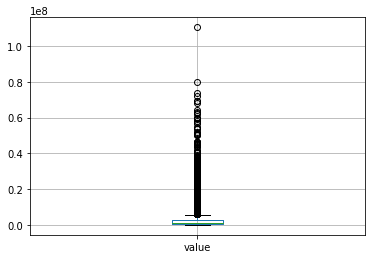

In [16]:
# IQR
train.boxplot(column=['value'])

### 회귀분석에 사용할 피쳐 탐색

In [17]:
train

,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
1,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
2,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
3,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0
4,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0
...,...,...,...,...,...,...,...,...,...,...
8927,18,africa,2019,MF,right,1.0,48,63,3.0,60000.0
8928,19,europe,2020,DF,right,1.0,47,59,2.0,40000.0
8929,18,south america,2021,DF,right,1.0,47,64,2.0,50000.0
8930,18,europe,2021,GK,right,1.0,47,65,1.0,50000.0


In [18]:
print(train.select_dtypes(exclude = object).columns)
print(test.select_dtypes(exclude = object).columns)

Index(['age', 'contract_until', 'reputation', 'stat_overall', 'stat_potential',
       'stat_skill_moves', 'value'],
      dtype='object')
Index(['age', 'contract_until', 'reputation', 'stat_overall', 'stat_potential',
       'stat_skill_moves', 'value'],
      dtype='object')


In [19]:
train.corr()

,age,contract_until,reputation,stat_overall,stat_potential,stat_skill_moves,value
age,1.000000,-0.132052,0.263468,0.467345,-0.231303,0.039362,0.087319
contract_until,-0.132052,1.000000,0.070446,0.156983,0.258477,0.082641,0.228638
reputation,0.263468,0.070446,1.000000,0.521389,0.399183,0.196582,0.665982
stat_overall,0.467345,0.156983,0.521389,1.000000,0.665453,0.400164,0.658444
stat_potential,-0.231303,0.258477,0.399183,0.665453,1.000000,0.332578,0.611907
stat_skill_moves,0.039362,0.082641,0.196582,0.400164,0.332578,1.000000,0.298500
value,0.087319,0.228638,0.665982,0.658444,0.611907,0.298500,1.000000


##EDA

### 계약기간별 연봉

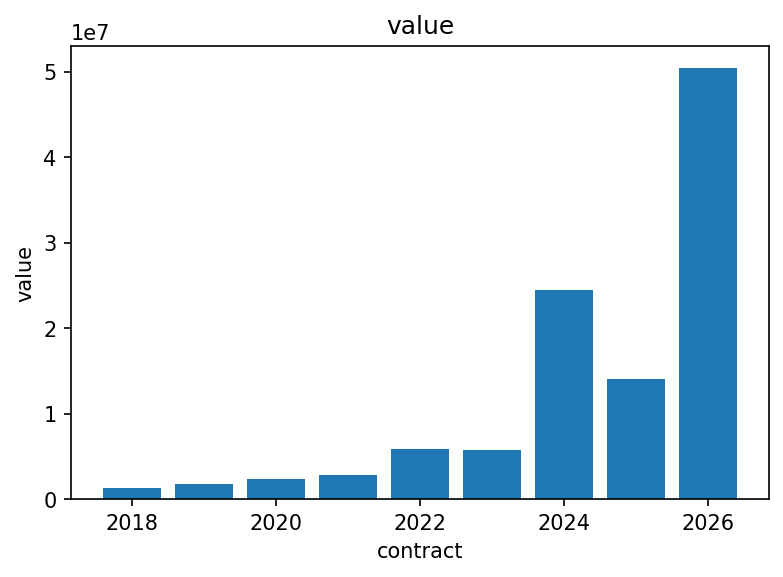

In [20]:
x = train.groupby('contract_until').mean()['value'].index
y = train.groupby('contract_until').mean()['value'].values

plt.figure(dpi=150)

plt.title('value')
plt.xlabel('contract')
plt.ylabel('value')

plt.bar(x, y)
plt.show()

### position 별 연봉

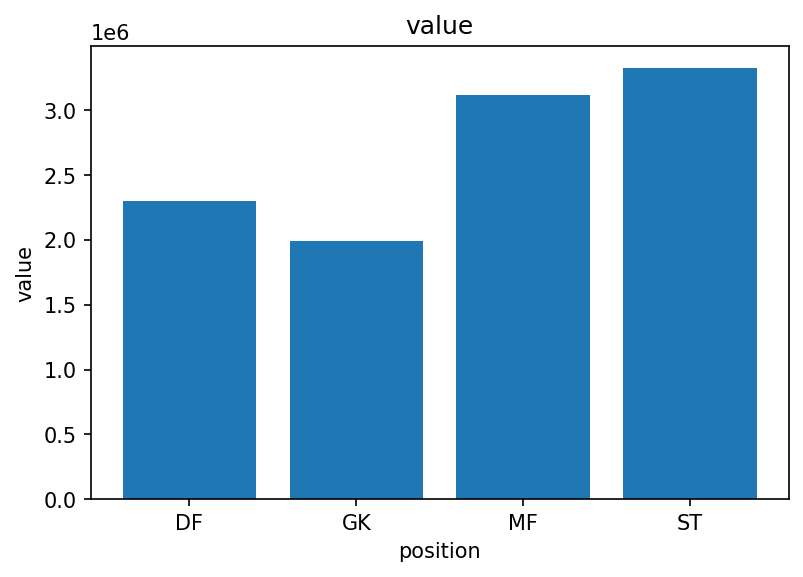

In [21]:
# position 에 따른 선수들의평균 몸값
x = train.groupby('position').mean()['value'].index
y = train.groupby('position').mean()['value'].values

plt.figure(dpi=150)

plt.title('value')
plt.xlabel('position')
plt.ylabel('value')

plt.bar(x, y)
plt.show()

### reputation별 연봉

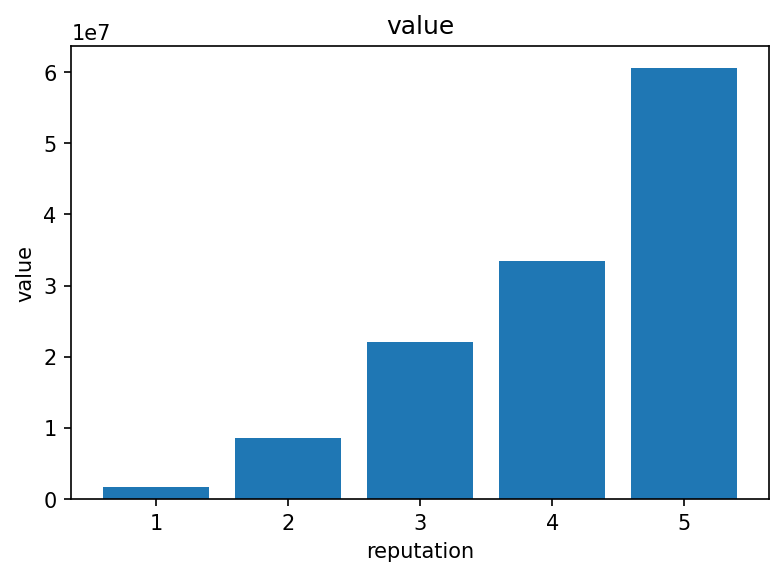

In [22]:
#reputation 에 따른 선수들의평균 몸값
x = train.groupby('reputation').mean()['value'].index
y = train.groupby('reputation').mean()['value'].values

plt.figure(dpi=150)

plt.title('value')
plt.xlabel('reputation')
plt.ylabel('value')

plt.bar(x, y)
plt.show()
#reputation에 비례한다

### 능력치별 연봉

<BarContainer object of 46 artists>

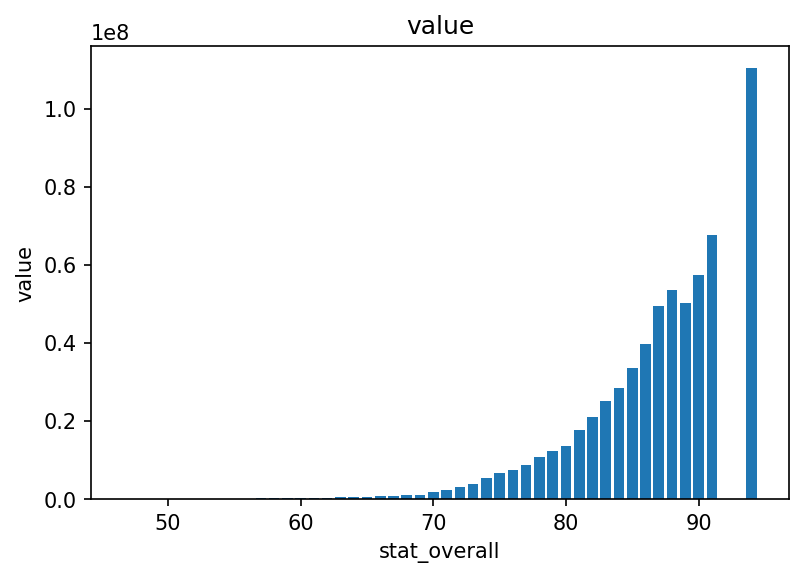

In [23]:
#stat_overall에 따른 선수가치
x = train.groupby('stat_overall').mean()['value'].index
y = train.groupby('stat_overall').mean()['value'].values

plt.figure(dpi=150)

plt.title('value')
plt.xlabel('stat_overall')
plt.ylabel('value')

plt.bar(x, y)
#비례함

### stat_potential 별 연봉

<BarContainer object of 45 artists>

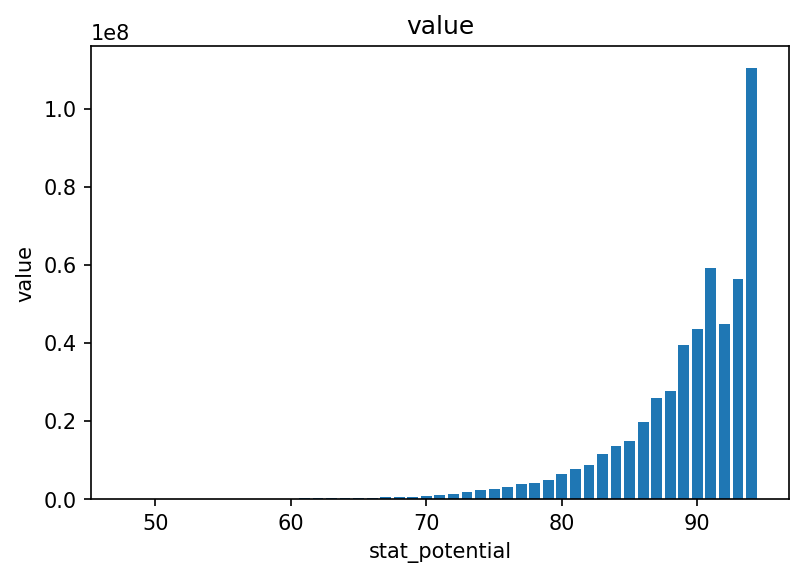

In [24]:
# stat_potential 따른 선수가치
x = train.groupby('stat_potential').mean()['value'].index
y = train.groupby('stat_potential').mean()['value'].values

plt.figure(dpi=150)

plt.title('value')
plt.xlabel('stat_potential')
plt.ylabel('value')

plt.bar(x, y)
#비례함

### continent 따른 선수가치


<BarContainer object of 5 artists>

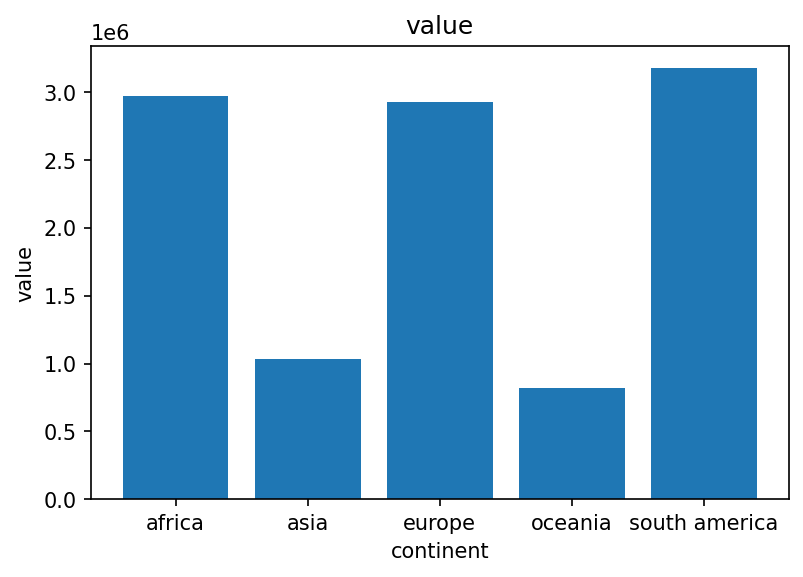

In [25]:
# continent 따른 선수가치
x = train.groupby('continent').mean()['value'].index
y = train.groupby('continent').mean()['value'].values

plt.figure(dpi=150)

plt.title('value')
plt.xlabel('continent')
plt.ylabel('value')

plt.bar(x, y)
#비례함

### boxplot

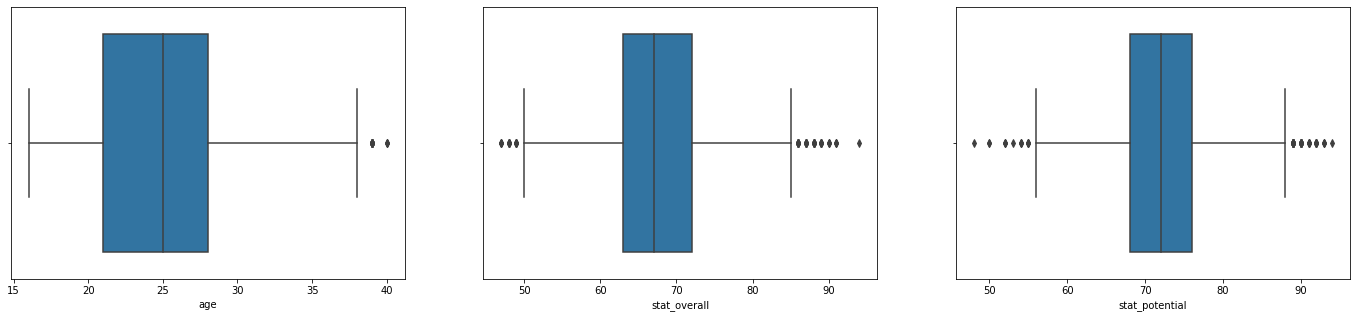

In [26]:
nums = ['age', 'stat_overall', 'stat_potential'] # 연속형 (continuous)
f, axes = plt.subplots(1,len(nums), figsize=(24,5))
axes = axes.flatten()                         
for col, ax in zip(nums, axes):
  sns.boxplot(data = train, x=col, ax=ax)
plt.show()

### corr

In [27]:
train.corr().style.background_gradient(cmap='Blues')
#reputation stat_overall stat_potential이 상관관계를 가짐

,age,contract_until,reputation,stat_overall,stat_potential,stat_skill_moves,value
age,1.000000,-0.132052,0.263468,0.467345,-0.231303,0.039362,0.087319
contract_until,-0.132052,1.000000,0.070446,0.156983,0.258477,0.082641,0.228638
reputation,0.263468,0.070446,1.000000,0.521389,0.399183,0.196582,0.665982
stat_overall,0.467345,0.156983,0.521389,1.000000,0.665453,0.400164,0.658444
stat_potential,-0.231303,0.258477,0.399183,0.665453,1.000000,0.332578,0.611907
stat_skill_moves,0.039362,0.082641,0.196582,0.400164,0.332578,1.000000,0.298500
value,0.087319,0.228638,0.665982,0.658444,0.611907,0.298500,1.000000


## LabelEncoder 

In [28]:
# from sklearn.preprocessing import LabelEncoder
# label = ['school','sex','address','famsize','Pstatus','Mjob','Fjob','reason','romantic']
# X_train[label] = X_train[label].apply(LabelEncoder().fit_transform)
# X_test[label] = X_test[label].apply(LabelEncoder().fit_transform)
# X_train

In [29]:
train.head()

,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
1,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
2,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
3,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0
4,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0


In [30]:
# 문자형 변수 label 인코딩 진행
train['continent']=train['continent'].astype('category').cat.codes
test['continent'] = test['continent'].astype('category').cat.codes

train['position'] = train['position'].astype('category').cat.codes
test['position'] = test['position'].astype('category').cat.codes

train['prefer_foot'] = train['prefer_foot'].astype('category').cat.codes
test['prefer_foot'] = test['prefer_foot'].astype('category').cat.codes
train.head()

,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,31,4,2021,3,0,5.0,94,94,4.0,110500000.0
1,27,2,2020,1,1,4.0,91,93,1.0,72000000.0
2,31,4,2021,3,1,5.0,91,91,3.0,80000000.0
3,32,2,2020,0,1,4.0,91,91,3.0,51000000.0
4,25,2,2021,1,1,3.0,90,93,1.0,68000000.0


## MinMaxScaler

In [31]:
print(train.shape)
print(test.shape)
print(train.select_dtypes(exclude = object).columns)
print(test.select_dtypes(exclude = object).columns)

(8932, 10)
(8932, 10)
Index(['age', 'continent', 'contract_until', 'position', 'prefer_foot',
       'reputation', 'stat_overall', 'stat_potential', 'stat_skill_moves',
       'value'],
      dtype='object')
Index(['age', 'continent', 'contract_until', 'position', 'prefer_foot',
       'reputation', 'stat_overall', 'stat_potential', 'stat_skill_moves',
       'value'],
      dtype='object')


In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = ['age', 'contract_until', 'reputation', 'stat_overall', 'stat_potential',
       'stat_skill_moves']
mm = MinMaxScaler()
mm.fit(train[scaler])
train[scaler] = mm.transform(train[scaler])
test[scaler] = mm.transform(test[scaler])
train.shape

(8932, 10)

In [33]:
test.shape

(8932, 10)

In [34]:
test.head()

,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0.625000,4,0.375,3,0,1.00,1.000000,1.000000,0.75,110500000.0
1,0.458333,2,0.250,1,1,0.75,0.936170,0.978261,0.00,72000000.0
2,0.625000,4,0.375,3,1,1.00,0.936170,0.934783,0.50,80000000.0
3,0.666667,2,0.250,0,1,0.75,0.936170,0.934783,0.50,51000000.0
4,0.375000,2,0.375,1,1,0.50,0.914894,0.978261,0.00,68000000.0


## train_test_split

In [35]:
train.info(), test.info()

from sklearn.model_selection import train_test_split
X = train.drop(['value'],axis=1)
y = train['value']

# train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               8932 non-null   float64
 1   continent         8932 non-null   int8   
 2   contract_until    8932 non-null   float64
 3   position          8932 non-null   int8   
 4   prefer_foot       8932 non-null   int8   
 5   reputation        8932 non-null   float64
 6   stat_overall      8932 non-null   float64
 7   stat_potential    8932 non-null   float64
 8   stat_skill_moves  8932 non-null   float64
 9   value             8932 non-null   float64
dtypes: float64(7), int8(3)
memory usage: 514.8 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               8932 non-null   float64
 1   continent         8932 no

,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves
4464,0.625000,2,0.250,3,1,0.0,0.425532,0.413043,0.50
2041,0.500000,4,0.625,0,0,0.0,0.531915,0.521739,0.50
4961,0.333333,2,0.375,0,0,0.0,0.404255,0.478261,0.25
7040,0.250000,2,0.375,0,0,0.0,0.319149,0.478261,0.25
6074,0.208333,2,0.375,0,0,0.0,0.361702,0.478261,0.25
...,...,...,...,...,...,...,...,...,...
7688,0.250000,1,0.500,0,1,0.0,0.276596,0.543478,0.25
4531,0.500000,2,0.250,0,1,0.0,0.425532,0.413043,0.25
7588,0.166667,2,0.250,3,1,0.0,0.276596,0.478261,0.25
945,0.666667,2,0.125,2,1,0.0,0.595745,0.586957,0.50


In [36]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7145, 9)
(1787, 9)
(7145,)
(1787,)


In [37]:
# y_test 값은 id 삭제 후 array형태로 변형
# y_test = y_test.drop('StudentID', axis=1)
# y_test= y_test.to_numpy()
# y_test
y_test.head()

4270     975000.0
2373    1800000.0
5166     825000.0
4925     650000.0
7284     290000.0
Name: value, dtype: float64

In [38]:
y_test= y_test.to_numpy()
y_test

array([  975000.,  1800000.,   825000., ...,   180000.,  1000000.,
       16000000.])

In [39]:
X_train.head()

,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves
4464,0.625000,2,0.250,3,1,0.0,0.425532,0.413043,0.50
2041,0.500000,4,0.625,0,0,0.0,0.531915,0.521739,0.50
4961,0.333333,2,0.375,0,0,0.0,0.404255,0.478261,0.25
7040,0.250000,2,0.375,0,0,0.0,0.319149,0.478261,0.25
6074,0.208333,2,0.375,0,0,0.0,0.361702,0.478261,0.25


In [40]:
X_test.head()

,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves
4270,0.375000,2,0.375,2,1,0.0,0.425532,0.500000,0.50
2373,0.666667,0,0.375,2,1,0.0,0.510638,0.500000,0.50
5166,0.375000,0,0.250,3,1,0.0,0.404255,0.456522,0.25
4925,0.375000,2,0.250,0,0,0.0,0.404255,0.434783,0.50
7284,0.250000,2,0.125,0,1,0.0,0.297872,0.391304,0.25


In [41]:
test_id.head()

0        L. Messi
1          De Gea
2       L. Suárez
3    Sergio Ramos
4        J. Oblak
Name: name, dtype: object

In [42]:
y_train.head()

4464     675000.0
2041    2500000.0
4961     700000.0
7040     375000.0
6074     525000.0
Name: value, dtype: float64

## RandomForestRegressor

In [46]:
X_train.columns

Index(['age', 'continent', 'contract_until', 'position', 'prefer_foot',
       'reputation', 'stat_overall', 'stat_potential', 'stat_skill_moves'],
      dtype='object')

In [47]:
test[['age', 'continent', 'contract_until', 'position', 'prefer_foot',
       'reputation', 'stat_overall', 'stat_potential', 'stat_skill_moves']]

,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves
0,0.625000,4,0.375,3,0,1.00,1.000000,1.000000,0.75
1,0.458333,2,0.250,1,1,0.75,0.936170,0.978261,0.00
2,0.625000,4,0.375,3,1,1.00,0.936170,0.934783,0.50
3,0.666667,2,0.250,0,1,0.75,0.936170,0.934783,0.50
4,0.375000,2,0.375,1,1,0.50,0.914894,0.978261,0.00
...,...,...,...,...,...,...,...,...,...
8927,0.083333,0,0.125,2,1,0.00,0.021277,0.326087,0.50
8928,0.125000,2,0.250,0,1,0.00,0.000000,0.239130,0.25
8929,0.083333,4,0.375,0,1,0.00,0.000000,0.347826,0.25
8930,0.083333,2,0.375,1,1,0.00,0.000000,0.369565,0.00


In [61]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=300)
rf.fit(X_train,y_train)
pred1=rf.predict(X_test)
pred1

array([  921943.05555556,  1810000.        ,   771000.        , ...,
         184600.        ,  1034666.66666667, 17208333.33333333])

In [62]:
pred1.shape

(1787,)

In [63]:
X_test.shape

(1787, 9)

In [64]:
y_test.shape

(1787,)

In [65]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=300)
rf.fit(X_train,y_train)
pred2=rf.predict(test[['age', 'continent', 'contract_until', 'position', 'prefer_foot',
       'reputation', 'stat_overall', 'stat_potential', 'stat_skill_moves']])
pred2

array([9.17416667e+07, 6.77450000e+07, 6.25583333e+07, ...,
       5.37000000e+04, 5.12333333e+04, 5.99666667e+04])

In [66]:
test.shape

(8932, 10)

In [67]:
#accuracy_score는 분류모델
#from sklearn.metrics import accuracy_score
#print('rf:',accuracy_score(y_test,pred1))
print(rf.score(X_train,y_train))

0.9961789881465981


In [68]:
from sklearn.metrics import r2_score
print(r2_score(y_test, pred1))

# pred_test = rf.predict(X_test)
# print(r2_score(y_test.G3, pred_test))

0.9831343046470158


## 모델 성능 평가 함수 생성


In [69]:
from lightgbm import LGBMRegressor
lgbm = LGBMRegressor(max_depth = 3, n_estimate = 400, learning_rate = 0.1,
                     metric = 'mse', randomstate=1)
lgbm.fit(X_train, y_train)



LGBMRegressor(max_depth=3, metric='mse', n_estimate=400, randomstate=1)

In [70]:
def regression_scores(y_true, y_pred) :
  import numpy as np
  from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
  
  MSE = mean_squared_error(y_true, y_pred)
  RMSE = np.sqrt(mean_squared_error(y_true,y_pred))
  MAE = np.mean( np.abs((y_true - y_pred) / y_true) )
  NMAE =mean_absolute_error(y_true, y_pred)/ np.mean( np.abs(y_true) )
  MAPE = np.mean( np.abs((y_true - y_pred) / y_true) ) *100
  R2 = r2_score(y_true, y_pred)
  return {'MSE' : np.round(MSE, 3), 
          'RMSE' : np.round(RMSE, 3),
          'MAE' : np.round(MAE, 3),
          'NMAE' : np.round(NMAE, 3),
          'MAPE' : np.round(MAPE, 3),
          'R2' : np.round(R2, 3)}

In [71]:
# 모델 성능 평가
y_pred = lgbm.predict(X_test)
regression_scores(y_test, y_pred)
#

{'MSE': 528524499056.009,
 'RMSE': 726996.904,
 'MAE': 0.236,
 'NMAE': 0.094,
 'MAPE': 23.557,
 'R2': 0.984}

In [72]:
test_id.shape

(8932,)

In [73]:
pred1.shape

(1787,)

## 새롭게 추가


In [74]:
# 전체 test 데이터에 대한 pred
full_pred = lgbm.predict(test[['age', 'continent', 'contract_until', 'position', 'prefer_foot',
       'reputation', 'stat_overall', 'stat_potential', 'stat_skill_moves']])

In [75]:
full_pred

array([73112302.49070653, 59491520.19072849, 67154031.53845203, ...,
         141654.47816796,   150720.49715824,   219429.96647784])

In [76]:
pd.DataFrame({'ID' : test_id.index, 'G3' : full_pred}).to_csv('Fifa.csv', index =False)
result = pd.read_csv('Fifa.csv')
print(result)

        ID            G3
0        0  7.311230e+07
1        1  5.949152e+07
2        2  6.715403e+07
3        3  5.226749e+07
4        4  5.908754e+07
...    ...           ...
8927  8927  2.804758e+05
8928  8928  1.606790e+05
8929  8929  1.416545e+05
8930  8930  1.507205e+05
8931  8931  2.194300e+05

[8932 rows x 2 columns]


In [ ]:
import pandas as pd

x_train =  pd.read_csv('data/X_train.csv')
y_train =  pd.read_csv('data/y_train.csv')
x_test = pd.read_csv('data/X_test.csv')

x_test_id = x_test['StudentID']

# x_train['G12'] = x_train['G1'] + x_train['G2'] 
# x_test['G12'] = x_test['G1'] + x_test['G2'] 

x_train = x_train.drop(columns=['StudentID','sex','age','freetime','famrel','Dalc','romantic'])
x_test = x_test.drop(columns=['StudentID','sex','age','freetime','famrel','Dalc','romantic'])
y_train = y_train.drop(columns='StudentID')

x_train = pd.get_dummies(x_train)
x_test = pd.get_dummies(x_test)


from sklearn.model_selection import train_test_split
X_TRAIN, X_TEST, Y_TRAIN, Y_TEST = train_test_split(x_train, y_train, test_size = 0.2, random_state = 10 )

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state = 10)
model.fit(X_TRAIN, Y_TRAIN)
Y_TEST_PREDICT = model.predict(X_TEST)
Y_TEST_PREDICT = Y_TEST_PREDICT.astype('int64')
y_test_predict = model.predict(x_test)
y_test_predict = y_test_predict.astype('int64')
y_test_predict = pd.DataFrame(y_test_predict)


from sklearn.metrics import r2_score
print(r2_score(Y_TEST_PREDICT, Y_TEST))

result = pd.concat([x_test_id, y_test_predict], axis=1)
result.columns = ['StudentID','G3']
result.to_csv('data/12345.csv', index=False)
result = pd.read_csv('data/12345.csv')

print(result)

In [ ]:
Dacon FIFA Player Values prediction
Dacon 해외 축구 선수 이적료 예측 미션

데이터 셋 기본 정보
종속변수(y) : value(연속형변수)
독립변수(x)
- 연속형 변수
  age, stat_overall, stat_potential
- 비연속형 변수(범주형 변수)
  contract_until, continent, position, prefer_foot, reputation, stat_skill_moves
EDA(Exploratory Data Analysis, 탐색적 데이터 분석)
- contract_until
# 계약기간 변수는 숫자와 문자로 결합 되어 있는 변수이다. 이를 처리 하기위해 문자를 숫자 포함하고 있는 변수들로 아래와 같이 처리 하였다.
comdata["contract_until"] = comdata["contract_until"].str.slice(-4,)
comdata["contract_until"]
# 위와 같이 변수를 전처리 후에 계약기간 변수의 범주 마다 빈도를 확인하면 2024년 이후의 범주는 2023년 이전 범주보다
# 빈도가 꽤 낮은 것을 확인 할 수 있다. 이와 같은 이유때문에 2024년 이후 범주는 모두 2024년으로 아래와 같이 통일 시켰다.
comdata.loc[comdata["contract_until"] == "2025", "contract_until"] = "2024"
comdata.loc[comdata["contract_until"] == "2026", "contract_until"] = "2024"

- continent
# 대륙 변수의 범주별 빈도를 확인 하면 오세아니아가 상대적으로 빈도가 작은 걸 확인 할 수 있지만
# 다른 빈도와 합치는 것은 모델링을 통해 RMSE점수를 확인 하고 시도해 볼 필요가 있다.

- position
# 포지션 변수는 당연하게도 골키퍼 포지션의 빈도수가 가장 작다.
# 선수들은 포지션별로 가지는 특성이 다르기 때문에 본래대로 분류해서 사용할 필요가 있다.

- prefer_foot
# 왼발잡이가 상대적으로 오른발잡이 보다 빈도가 작다.
# ttest를 통해 왼발과 오른발의 선수가치 평균을 확인 해보면 차이가 없는 것을 확인해 볼수있다.
# 범주형 변수를 분석에 사용하기 위해서는 더미변수를 사용해 전처리가 필요한데, 이진속성 변수는 변수를 0,1로 변환해주면 된다.
# replace 여러개의 변수를 처리 할 때는 [](리스트)를 사용하면 된다.
comdata["prefer_foot"] = comdata["prefer_foot"].replace(["right", "left"], [0, 1])

- reputation
# 선수명성 변수는 숫자로 되어 있지만 1 ~ 5사이의 범주로 설정이 되어 있어 있는 범주형 변수이다.
# 5점 범주가 많이 작은 빈도를 보인다. 이는 연속형 변수로 보면 이상치가 될 수도 있다. 실제 
# 모델링을 통해 예측력을 높이기 위한 전처리 과정 중 하나가 될 수 있다.

- stat_skill_moves
# 개인기 변수는 선수명성 변수와 같은 숫자로 되어 있지만 1 ~ 5사이 5점척도로 되어 있는 범주형변수이다.
# 또한, 5점 범주가 많이 작은 빈도를 보인다. 선수명성과 같이 전처리 과정 중 하나가 될 수 있다.

- age
# distplot으로 분포를 확인해보면 정규성을 보이는 것을 볼 수 있고 boxplot을 통해 이상치를
# 확인해 보면 이상치가 존재 하는걸 볼 수 있다. 이상치를 해결 하기위한 전처리 과정이 필요하다.

- stat_overall, stat_potential
# 오버롤, 포텐션 변수를 displot으로 분포를 확인해 보면 평균보다 중앙값, 최빈수가 큰 정적편포를 보인다.
# 또한, boxplot을 사용해 이상치를 확인해 보면 이상치가 존재 하는걸 불 수 있다. 이는 이상치를 해결 하기 위해
# 전처리 과정이 필요하다는 것을 나타낸다.
데이터 전처리
# age, stat_overall, stat_potential 변수는 RobustScaler를 사용해 표준화를 하였다.
# RobustScaler : 특성들이 같은 스케일을 갖게 된다는 통계적 측면에서는 StandardScaler와 비슷하다.
# 하지만 평균과 분산대신 중간값과 사분위값을 사용해 이상치에 영향을 받지 않는다.

# One-Hot-encoding 더미변수 생성(범주형 변수)
train_dummy = pd.get_dummies(train)
real_test_dummy = pd.get_dummies(real_test)
model 평가
# Gridsearch로 확인 한 결과 xgboost 가장 좋은 예측력을 보였고 또한 특성공학을 통해
# 최적의 파라미터를 찾았다.
# rmse : 215126074267.982 정도의 점수가 나왔다. 좀 더 높은 점수를 얻기 위해 새로운 전처리 방법이 필요하다.
# ex) 나이를 전성기에 접어든 나이와 그보다 어리고 많은 나이 그룹으로 나누기 등
부족한 점 review
# np.inf = 무한대를 표시
pd.cut(df, [0, 1, np.inf], labels = ["a","b"])
# 0 <= a < 1, b >= 1

# count() vs size() vs nunique()
# count() : 결측치를 포함하지 않은 값 반환
# size() : 결측치를 포함한 값의 길이 반환
# nunique() : 결측치를 제외한 유일값 리턴

# df.rename(columns = {"기존 열 이름" : "새로운 열 이름"})
# df의 열이름을 변경할때 dict형을 이용하면 쉽게 바꿀수 있이다.

# df.largest(n, columns, keep = "first")
# 지정한 열의 n개 만큼 내림 차순으로 값을 반환 한다.
# keep = "first" : 중복 값중 첫번째, "last" : 마지막 값, "all" : 모든 값 반환
# df.sort_values(columns, ascending = False).head(n)가 같지만 좀 더 능률이 좋다.

# df.reset_index
# df의 기존 index를 열에 추가 시키고, 새로운 순차 수열 index 생성
# df.reset_index(drop = True) : 기존 index 제거, 새로운 순차 수열 index 생성

# pd.merge()
# 두 객체에 중복된 컬럼 이름이 하나도 없다면 따로 지정해준다. 아래는 지정 방법이다.
# pd.merge(left_on)  : 조인키로 사용할 left DataFrame의 컬럼
# pd.merge(right_on) : 조인키로 사용할 right DataFrame의 컬럼